# Updated Voce-Chaboche Model Fitting Example 1

An example of fitting the updated Voce-Chaboche (UVC) model to a set of test data is provided.

Documentation for all the functions used in this example can be found by either looking at docstrings for any of the functions.

In [1]:
import RESSPyLab as rpl
import numpy as np

## Run optimization with single test data set

This is a simple example for fitting the UVC model to a set of test data.
We only use one backstresses in this model, additional backstresses can be specified by adding pairs of `0.1`'s to the list of `x_0`. E.g., three backstresses would be 
```
x_0 = [200000., 355., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
```
Likewise, two backstresses can be specified by removing two pairs of `0.1`'s from the list below.

The overall steps to calibrate the model parameters are as follows:
1. Load the set of test data
2. Choose a starting point
3. Set the location to save the analysis history
4. Run the analysis

Step 4. from above is slightly more complicated for the updated model than it is for the original model.
This step is divided into two parts:
a) Run the original model with the same number of backstresses to obtain an initial set of parameters (without the updated parameters)
b) Run the updated model from the point found in 4a.

If you already have an initial set of parameters you can skip substep 4a by setting `find_initial_point=False`.

In [2]:
# Specify the true stress-strain to be used in the calibration
# Only one test used, see the VC_Calibration_Example_1 example for multiple tests
data_files = ['example_1.csv']

# Set initial parameters for the UVC model with one backstresses
# [E, \sigma_{y0}, Q_\infty, b, D_\infty, a, C_1, \gamma_1]
x_0 = np.array([200000., 355., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Log files for the parameters at each step, and values of the objective function at each step
# The logs are only kept for step 4b, the result of 4a will be the first entry of the log file
x_log = './output/x_log_upd.txt'
fxn_log = './output/fxn_log_upd.txt'

# (Optional) Set the number of iterations to run in step 4b
# The recommended number of iterations is its = [300, 1000, 3000]
# For the purpose of this example less iterations are run
its = [30, 30, 40]

# Run the calibration
# Set filter_data=True if you have NOT already filtered/reduced the data
# We recommend that you filter/reduce the data beforehand
x_sol = rpl.uvc_param_opt(x_0, data_files, x_log, fxn_log, find_initial_point=True, filter_data=False,
                          step_iterations=its)


##########      New Lagrangian Step      ###########

It. = 1:	f(x) = 9.933485e+03 ; ||grad[L]|| = 3.618753e+03
x =  [194212.949    361.141      0.103      0.103      0.103      0.103]

It. = 2:	f(x) = 8.985734e+03 ; ||grad[L]|| = 2.915328e+03
x =  [183600.543    373.347      0.111      0.111      0.111      0.111]

It. = 3:	f(x) = 7.300635e+03 ; ||grad[L]|| = 1.784776e+03
x =  [164806.315    397.191      0.131      0.131      0.131      0.131]

It. = 4:	f(x) = 4.769137e+03 ; ||grad[L]|| = 7.523199e+02
x =  [154551.292    417.931      0.175      0.175      0.175      0.175]

It. = 5:	f(x) = 3.841227e+03 ; ||grad[L]|| = 3.177946e+02
x =  [149256.362    419.442      0.233      0.233      0.233      0.233]

It. = 6:	f(x) = 3.710453e+03 ; ||grad[L]|| = 1.345758e+02
x =  [146499.258    419.934      0.312      0.311      0.311      0.31 ]

It. = 7:	f(x) = 3.661428e+03 ; ||grad[L]|| = 5.732478e+01
x =  [145182.654    420.115      0.418      0.418      0.416      0.414]

It. = 8:	f(x) = 3.6400

The minimization problem in 4b above is solved in multiple steps because it is typically difficult to find a minimum to the UVC problem with a strict tolerance.
Each step successively relaxes the tolerance on the norm of the gradient of the Lagrangian.
The first step is 30 iterations at 1e-8, then 30 iterations at 1e-2, then a maximum of 50 iterations at 5e-2.
Confidence in the solution point can be gained using the visualization tools shown in the Visualization_Example_1 Notebook.

In the case shown above, the analysis exits during the third step.

## Plot results

After the analysis is finished we can plot the test data versus the fitted model. 

If we set `output_dir='./output/'` instead of `output_dir=''` the `uvc_data_plotter` function will save pdf's of all the plots instead of displaying them below.

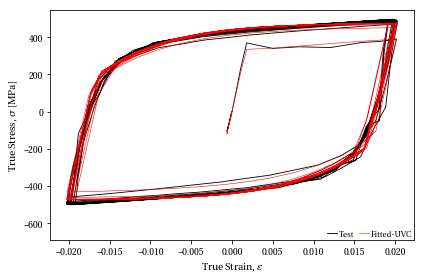

[<Figure size 432x288 with 1 Axes>]

In [4]:
data = rpl.load_data_set(data_files)
rpl.uvc_data_plotter(x_sol[0], data, output_dir='', file_name='uvc_example_plots', plot_label='Fitted-UVC')